In [1]:
import os, sys
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import svm
from sklearn import datasets
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor


In [43]:
dataset = pd.read_csv('./Prediction/Final.csv')


dataset = dataset.fillna(0)

# dataset.to_csv('clean_sequences.csv', index=False)


In [44]:
dataset.shape

(1903, 12)

In [45]:
dataset.describe()

,Age,d180,d180N,L*,SST,Alkane,Alkanol,Sediment,Red,Green,Blue,Grey
count,1903.000000,1903.000000,1.903000e+03,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000
mean,1534.177614,3.807486,1.366267e-11,-0.290495,-0.352962,0.196626,0.308987,0.170414,0.009124,0.007043,0.006127,0.007615
std,1176.593587,0.498841,1.000000e+00,1.001075,1.045943,0.962319,0.986020,1.131473,0.496331,0.491195,0.490241,0.492846
min,0.000000,2.775000,-2.560963e+00,-2.902871,-2.494080,-1.439872,-2.748250,-2.025494,-3.238145,-3.037077,-2.752926,-3.075705
25%,475.500000,3.426000,-7.267121e-01,-1.059356,-1.436499,-0.282659,0.000000,-0.451596,0.000000,0.000000,0.000000,0.000000
50%,1302.000000,3.783000,4.908591e-02,-0.112870,0.000000,-0.031016,0.178058,-0.030568,0.000000,0.000000,0.000000,0.000000
75%,2441.500000,4.170000,7.647445e-01,0.501482,0.534591,0.463392,0.778891,0.320162,0.000000,0.000000,0.000000,0.000000
max,4260.000000,5.085000,2.069769e+00,1.585409,1.440398,5.710774,6.465403,4.233408,1.415121,1.448314,1.586844,1.412118


In [46]:
dataset.tail(-10)

,Age,d180,d180N,L*,SST,Alkane,Alkanol,Sediment,Red,Green,Blue,Grey
10,10,3.523,0.570294,-2.285739,-1.970005,5.334847,3.454411,2.729549,-0.710614,-1.095243,-1.328928,-1.008937
11,11,3.597,0.421950,-2.028815,-1.887668,5.710774,3.664991,2.729549,-0.569124,-0.902878,-1.126968,-0.831966
12,12,3.924,-0.233569,-1.864305,-1.959463,5.489679,3.804791,2.729549,-0.478302,-0.597963,-0.812246,-0.589078
13,13,4.055,-0.496178,-2.455493,-2.020330,5.397252,3.722388,2.729549,-0.738454,-0.780411,-0.905388,-0.784094
14,14,4.281,-0.949228,-2.575363,-1.905597,4.967203,3.435405,2.729549,-1.039355,-1.087011,-1.238789,-1.093504
...,...,...,...,...,...,...,...,...,...,...,...,...
1898,4240,2.975,1.668840,1.513896,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1899,4245,3.028,1.562594,1.327339,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1900,4250,3.000,1.618724,1.423973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1901,4255,3.129,1.360124,1.069771,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Saving figure L*_vs_d18O


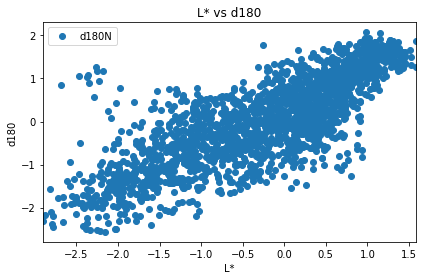

In [94]:
dataset.plot(x='L*', y='d180N', style='o')  
plt.title('L* vs d180')  
plt.xlabel('L*')  
plt.ylabel('d180')  
save_fig('L*_vs_d18O')

Saving figure Age_d180N_scatterplot


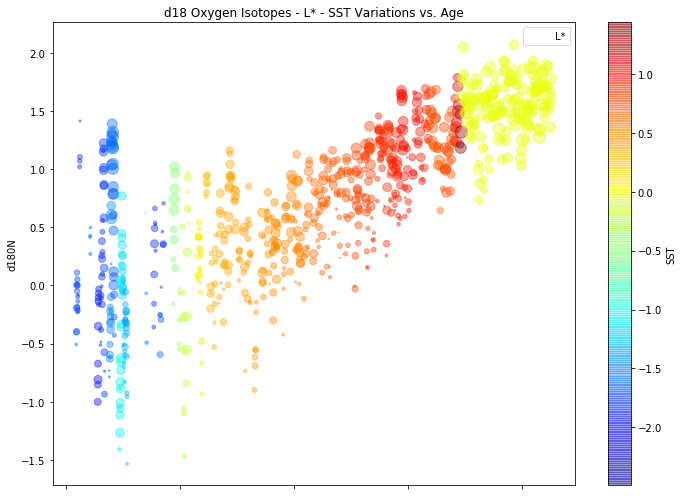

In [33]:
dataset.plot(kind="scatter", x="Age", y="d180N", alpha=0.4,
            title='d18 Oxygen Isotopes - L* - SST Variations vs. Age',
            s=dataset["L*"]*100, label="L*", figsize=(10,7),
            c="SST", cmap=plt.get_cmap("jet"), colorbar=True,
            sharex=True)
plt.legend()

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGE_ID = "Final_Images"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "Images", IMAGE_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
save_fig("Age_d180N_scatterplot")

Saving figure scatter_matrix_plot


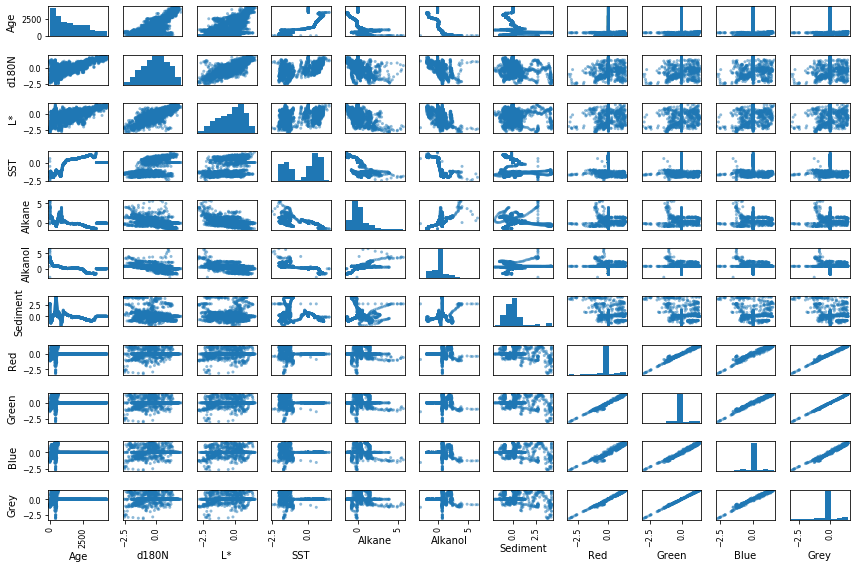

In [34]:
from pandas.plotting import scatter_matrix

attributes = ["Age", "d180N", "L*", "SST", "Alkane", "Alkanol",
              "Sediment", "Red", "Green", "Blue", "Grey"]
scatter_matrix(dataset[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

In [77]:
corr = dataset.corr()
corr

,Age,d180,d180N,L*,SST,Alkane,Alkanol,Sediment,Red,Green,Blue,Grey
Age,1.000000,-0.733793,0.733793,0.591067,0.789961,-0.577258,-0.751175,-0.367350,-0.015423,-0.003172,0.005233,-0.005982
d180,-0.733793,1.000000,-1.000000,-0.788023,-0.565564,0.471526,0.531912,0.301393,-0.102956,-0.102454,-0.100798,-0.102808
d180N,0.733793,-1.000000,1.000000,0.788023,0.565564,-0.471526,-0.531912,-0.301393,0.102956,0.102454,0.100798,0.102808
L*,0.591067,-0.788023,0.788023,1.000000,0.436022,-0.544726,-0.498630,-0.110806,0.104370,0.138728,0.161690,0.131513
SST,0.789961,-0.565564,0.565564,0.436022,1.000000,-0.652548,-0.781186,-0.329953,-0.058738,-0.047157,-0.041370,-0.050254
Alkane,-0.577258,0.471526,-0.471526,-0.544726,-0.652548,1.000000,0.749056,0.013755,0.028759,-0.023222,-0.062219,-0.012059
Alkanol,-0.751175,0.531912,-0.531912,-0.498630,-0.781186,0.749056,1.000000,0.319159,-0.014435,-0.061603,-0.096420,-0.051492
Sediment,-0.367350,0.301393,-0.301393,-0.110806,-0.329953,0.013755,0.319159,1.000000,-0.322531,-0.282905,-0.237479,-0.290638
Red,-0.015423,-0.102956,0.102956,0.104370,-0.058738,0.028759,-0.014435,-0.322531,1.000000,0.989029,0.968095,0.993727
Green,-0.003172,-0.102454,0.102454,0.138728,-0.047157,-0.023222,-0.061603,-0.282905,0.989029,1.000000,0.988829,0.999180


Saving figure correlation_matrix


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


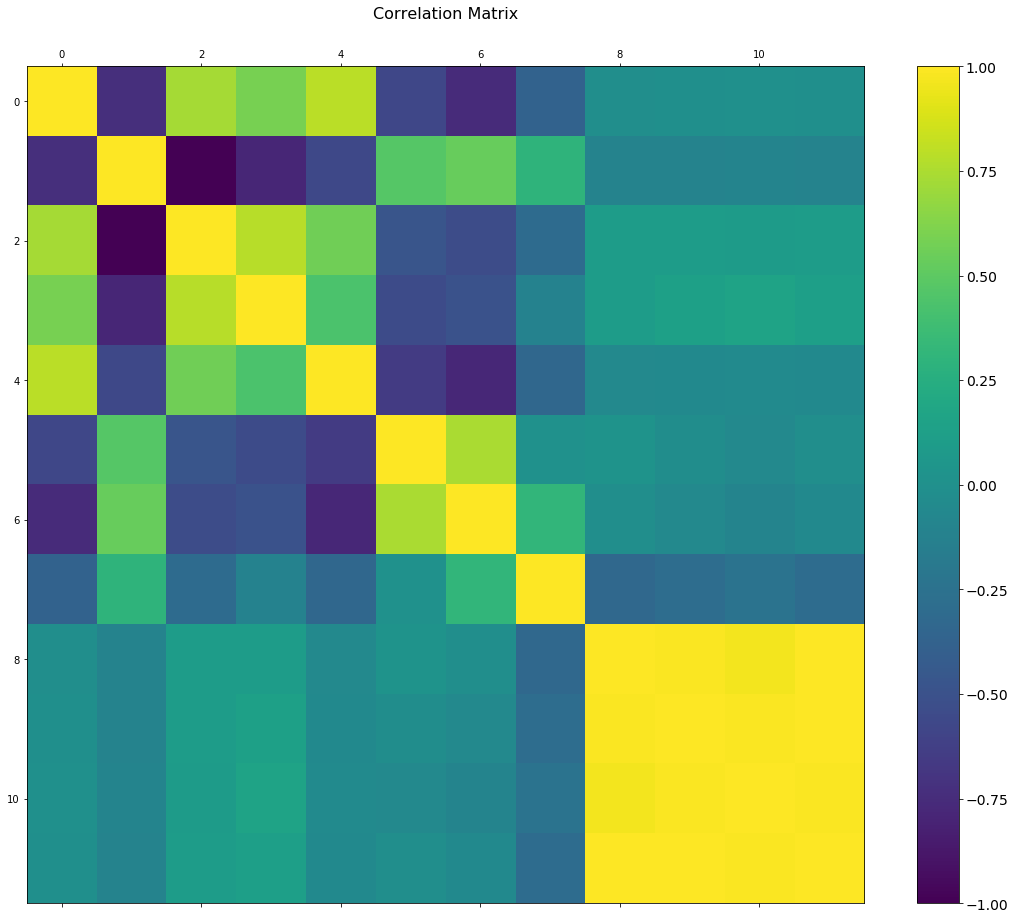

In [75]:
f = plt.figure(figsize=(19, 15))
plt.matshow(dataset.corr(), fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

save_fig('correlation_matrix')

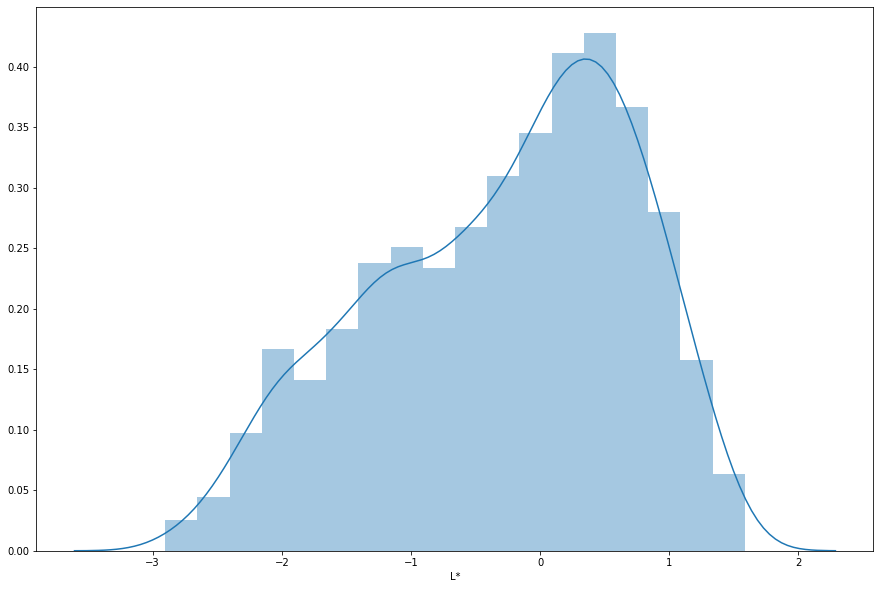

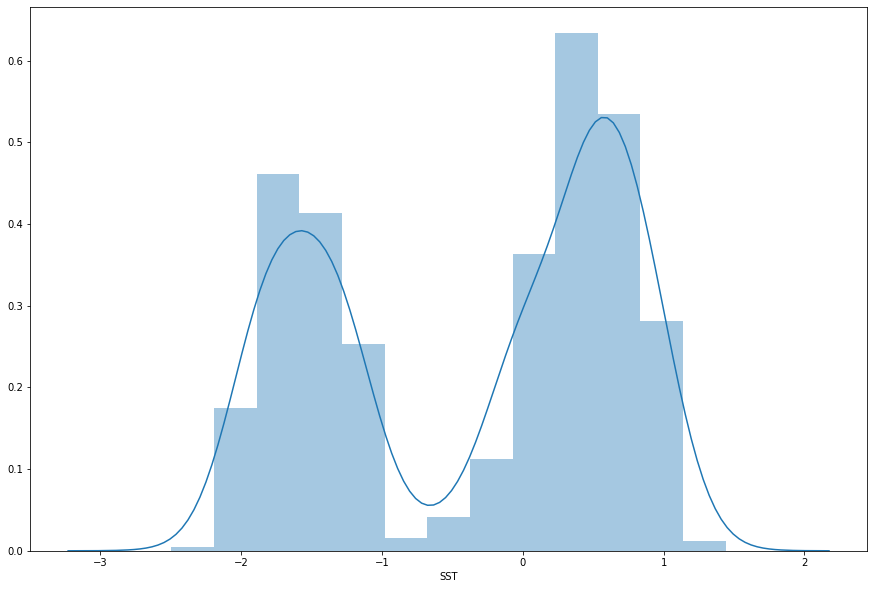

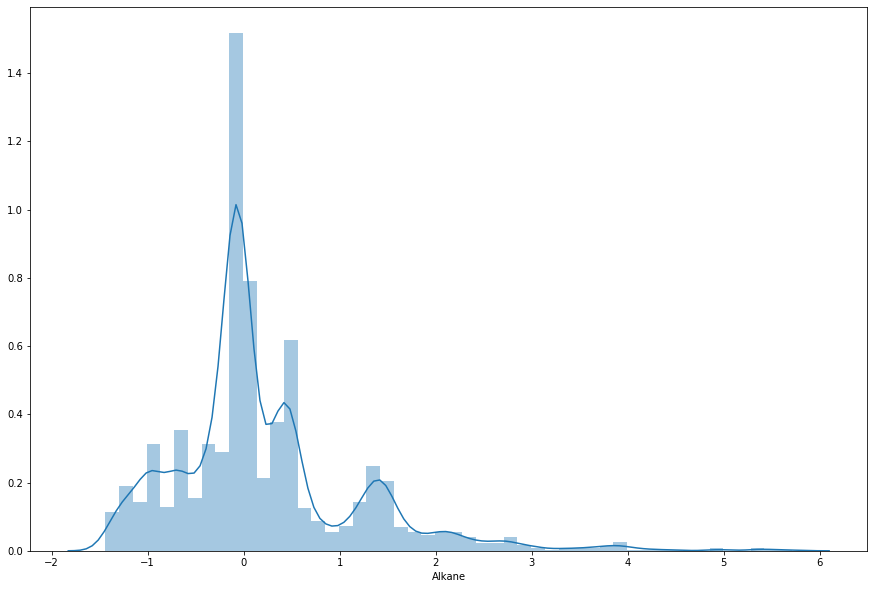

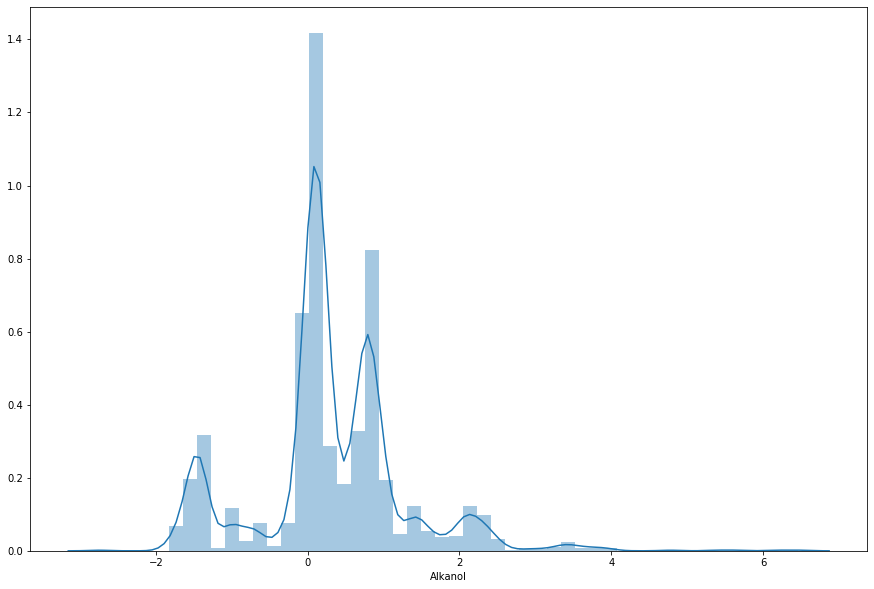

In [9]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['L*'])

plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['SST'])

plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['Alkane'])

plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['Alkanol'])


In [80]:
X = dataset['L*'].values.reshape(-1,1)
y = dataset['d180N'].values.reshape(-1,1)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [82]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[0.23515422]
[[0.80169132]]


In [84]:
y_pred = regressor.predict(X_test)

In [85]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

Saving figure residule_plot


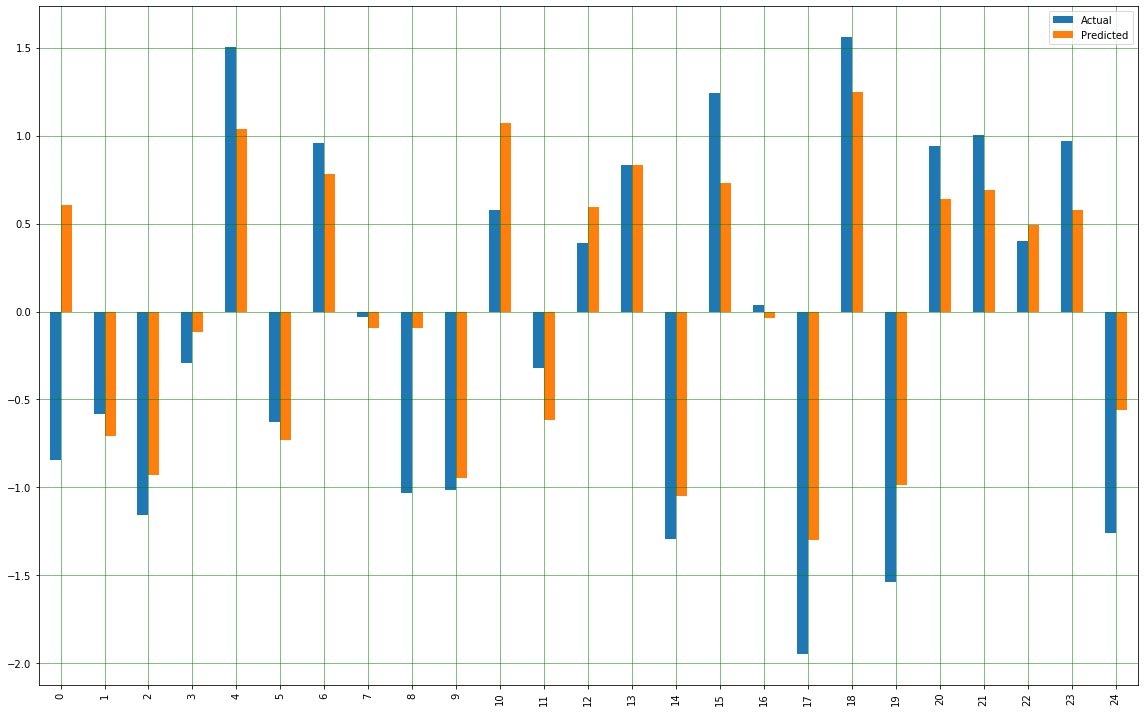

In [91]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
save_fig('residule_plot')

Saving figure linear_regression_resulting_fit


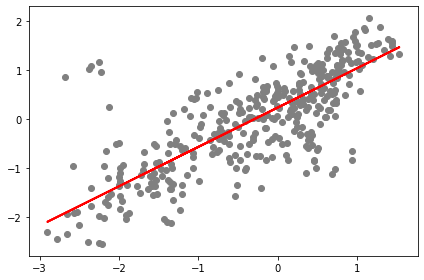

In [92]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
save_fig('linear_regression_resulting_fit')

In [90]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r^2 Accuracy:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.47475722890837146
Mean Squared Error: 0.42316909540976577
Root Mean Squared Error: 0.6505144851652158
r^2 Accuracy: 0.5753493278771502


Ok, not good.  We will try to CV to see if that improves, but all in all the data set is not big enough to make a difference.



Let's try a SVM; some CV; and then move onto multivariate

In [19]:
dataset.shape

(1903, 12)

In [95]:
X_data1 = dataset.drop(columns = ['d180','d180N'])
y_data1 = dataset.drop(columns = ['Age','d180','L*','SST','Alkane','Alkanol','Sediment','Red','Green','Blue','Grey'])

In [96]:
X_data1_scaled = preprocessing.scale(X_data1)
y_data1 = y_data1.values.reshape(-1,1)
X_data1_scaled.shape

(1903, 10)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_data1_scaled, y_data1, test_size=0.4, random_state=0)

print(X_train.shape, y_train.ravel().shape)
print(X_test.shape, y_test.ravel().shape)

clf = SVR(kernel='rbf', C=0.5).fit(X_train, y_train.ravel())
clf.score(X_test, y_test.ravel())          

(1141, 10) (1141,)
(762, 10) (762,)


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7844590219706337

In [ ]:
# clf.score()

In [98]:
from sklearn.externals.joblib import parallel_backend

def svc_param_selection(X, y):
    Cs = [0.01, 0.1, 1, 10,20,50]
    gammas = [0.01, 0.5, 1]
    kernel = ['rbf','linear','poly']
    param_grid = {'C': Cs, 'gamma' : gammas, 'kernel': kernel}
    grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid,n_jobs=-1)
    with parallel_backend('threading'):
    #would need to add back in ,cv = nfolds after param_grid
        grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [99]:
svc_param_selection(X_train,y_train.ravel())

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X_data1_scaled, y_data1, test_size=0.1, random_state=42)

print(X_train.shape, y_train.ravel().shape)
print(X_test.shape, y_test.ravel().shape)

clf1 = SVR(kernel='rbf', C=10,gamma = 0.5).fit(X_train, y_train.ravel())
clf1.score(X_test, y_test.ravel())                    


(1712, 10) (1712,)
(191, 10) (191,)


0.8915842046764281

In [150]:
preds = clf1.predict(X_test)
true = y_test.copy()

Saving figure SVR_10_preds_vs_true


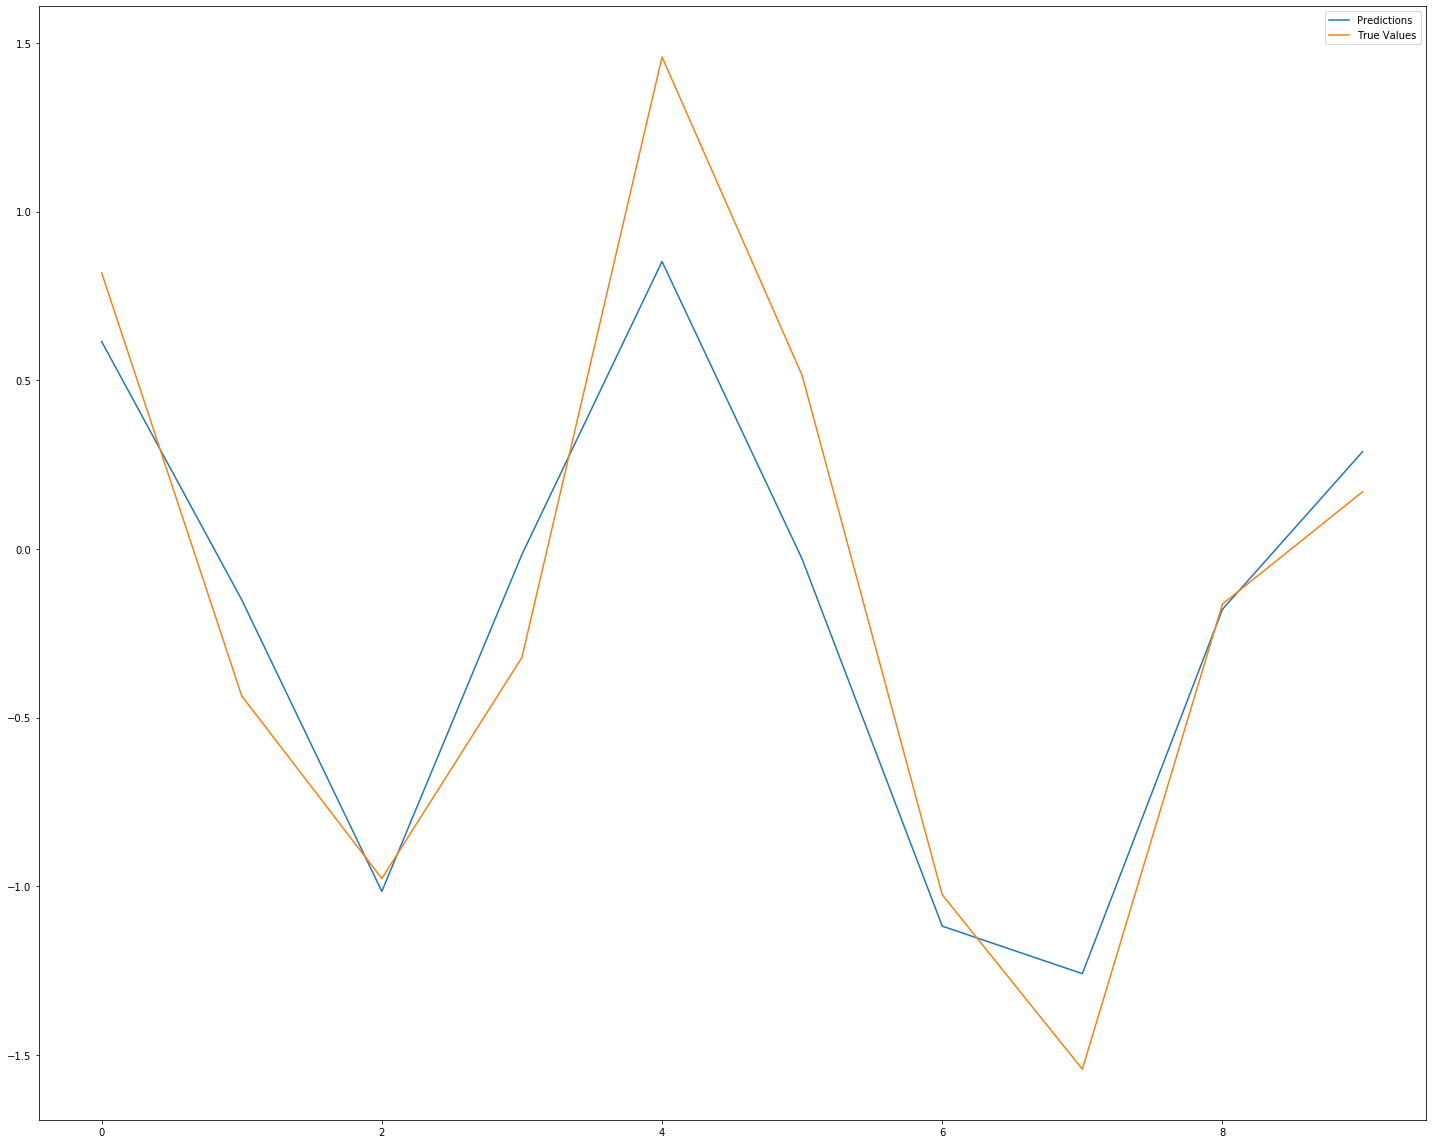

In [151]:
plt.figure(figsize=(20, 16))
plt.plot(preds[:10], label='Predictions')
plt.plot(true[:10], label='True Values')
plt.legend()
save_fig('SVR_10_preds_vs_true')

In [152]:
SVR_MAE = np.sum(np.abs(true - preds)) / len(preds)
SVR_MAE

204.60357386386235

In [154]:
clf1.score(X_test, y_test)

0.8915842046764281

pretty good, but let's continue with other models

In [145]:
from sklearn.model_selection import cross_val_score

clf2 = SVR(kernel='rbf', C=10, gamma = 0.5)
scores = cross_val_score(clf2,X_train,y_train.ravel(), cv = 50)
scores



array([0.92790018, 0.95070573, 0.83232988, 0.89540991, 0.84579691,
       0.8811379 , 0.82660256, 0.68322229, 0.86278857, 0.75190868,
       0.90368336, 0.83279254, 0.74176068, 0.85584827, 0.91277636,
       0.9205156 , 0.89069157, 0.89174389, 0.93802078, 0.9340672 ,
       0.67221931, 0.89706779, 0.85303444, 0.75741468, 0.87567972,
       0.87385814, 0.88206284, 0.81523233, 0.79554996, 0.9219864 ,
       0.85910864, 0.89993388, 0.91913865, 0.86117767, 0.89603007,
       0.82003396, 0.88568229, 0.81964054, 0.8800141 , 0.88347847,
       0.90167054, 0.9361396 , 0.82291564, 0.8547182 , 0.76515955,
       0.80205426, 0.82401478, 0.85585214, 0.92659182, 0.83116541])

In [146]:
np.mean(scores)

0.8573665743110075

In [147]:
np.max(scores)

0.9507057294524409

In [148]:
np.min(scores)

0.6722193128225558

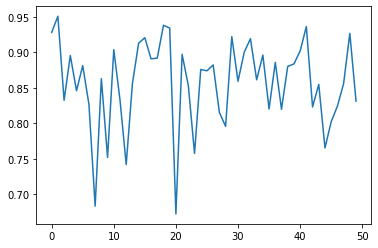

In [149]:
plt.plot(scores)